# Data Preparation Tutorial for Machine Learning

In this tutorial we will look at how to prepare your data for optimal results in machine learning. We will combine data on bike traffic and data on weather conditions, because we want to predict how much bike traffic we can expect based on what the weather is like. We will access Open Data sources, verify the data for structure and consistency, and clean up any spelling or formatting errors that would impair a computing process, and enrich the data with any additional values that you need to produce accurate results.

For actually using the data we use the simplest Machine Learning model there is, Linear Regression, which can make predictions of output data based on previously unseen input data by essentially drawing the best fitting line through all of the input data it was trained on.

But where do we get our data?! Fortunately, the city of Ottawa has a few bike counters keeping daily counts of cyclists along certain routes. Their Open Data website is very helpful. For the weather, we can use Environment Canada which lets you download historical weather data. We can combine these two data sets to get our training data. We have already downloaded the datasets and you can find them in the tutorial repostory.

## Learning Objectives

Average time to complete: 60min

By the end of this tutorial you should be able to:
* Clean your data and describe why this is important for machine learning
* Combine data sets
* Remove outliers and unneeded data
* Filling out the missing data
* Visualize data to gain insights
* Describe what the Linear Regression is and how we use it

## What you will need for this tutorial

* See the [introduction document](https://uottawa-it-research-teaching.github.io/machinelearning/) for general requirements and how Jupyter notebooks work.
* We'll need Pandas for convenient data handling. It's a very powerful Python package that can read CSV and Excel files. It also has very good data manipulation capabilities which come in use for data cleaning.
* We will use scikit learn as our machine learning package.
* The data files that should have come with this notebook.

## RDM best practices

Good data handling for machine learning begins with good Research Data Managment (RDM). The quality of your source data will impact the outcome of your results, just like the reproducibility of your results will depend on the quality of your data sources, in addition to how you organize the data so that other people (and machines!) can understand and reuse it. 

We also need to respect a few research data management best practices along the way, these best practices are recommended by the [Digital Research Alliance of Canada](https://zenodo.org/records/4000989).

SAVE YOUR RAW DATA IN ORIGINAL FORMAT
* Don't overwrite your original data with a cleaned version.
* Protect your original data by locking them or making them read-only.
* Refer to this original data if things go wrong (as they often do).

BACKUP YOUR DATA
* Use the 3-2-1 rule: Save three copies of your data, on two different storage mediums, and one copy off site. The off site storage can be OneDrive or Google drive or whatever your institution provides.
* We are using Open Data, so it does not contain any personally identifiable data or data that needs to be restricted or protected in any way. However, if your data contains confidential information, it is important to take steps to restrict access and encrypt your data.

There are a few more RDM best practices that will help you in your project management, and we will highlight them at the beginning of each tutorial. 

## Cleaning your data

We will rely heavily on Pandas for our data cleaning since it has very power filtering and manipulation tools to get our data formatted to allow for easy analysis using Linear Regression. When you use data from other sources the data cleaning process can be time consuming, but it is an important step to ensure that your results are accurate. 

In [1]:
# If you are running this code on SyZyGy you need to install a slightly newer version of Pandas.
# Run this cell and then restart the kernel.
!pip install "pandas>=1.5.3"

In [2]:
import numpy as np
import pandas as pd
pd.__version__

'1.5.3'

We will look at bike traffic and we want to predict how much bike traffic we can expect based on what the weather is like.

To be able to do this, we need data on bike traffic and data on weather conditions. Fortunately, the city of Ottawa has a few bike counters gather daily counts of cyclists along certain routes. Their [Open Data website](https://open.ottawa.ca/) is very helpful. For the weather, we can use Environment Canada which lets you [download historical weather data](https://climate.weather.gc.ca/historical_data/search_historic_data_e.html). We can combine these two data sets to get our training data.

#### Data set 1: Cycling data

The very first step in data cleaning, is reading the data! Make sure you have "bike_counter.xlsx" that should have come with this notebook. If you don't have it, you can download it from the link in the comment below.

In [3]:
# https://open.ottawa.ca/documents/bicycle-trip-counters/about
bike2020 = pd.read_excel('bike_counter.xlsx', sheet_name="2020")

The data has now been read by Pandas and stored in the variable `bike2020` so we can now use it within our notebook.

Let's see what we got

In [4]:
bike2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       366 non-null    datetime64[ns]
 1   1^ALEX     257 non-null    float64       
 2   2^ORPY     257 non-null    float64       
 3   3^COBY     267 non-null    float64       
 4   4^CRTZ     366 non-null    int64         
 5   5^LMET     366 non-null    int64         
 6   10^OGLD    360 non-null    float64       
 7   11 OBVW    365 non-null    float64       
 8   12a^ADAWE  336 non-null    float64       
 9   12b^ADAWE  336 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 28.7 KB


The column names may seem very cryptic, but fortunately, the City of Ottawa follows good RDM best practices and has described the variables in a summary on their website. This clear documentation of the variables as they correspond to the data collection process helps us to reuse this data!

The summary explains that these columns represent aspects of the various routes that data was collected on. 

*Non-null* values are the number of days that the equipment registered "counts of bike trips (both directions summed unless otherwise noted)" 

Notice that we have 366 entries (one for each day of a leap-year), but if we look at the routes, we don't always have 366 non-null values. *This indicates missing data!*

Missing data is fairly typical for raw datasets. The summary of this particular data set on Open Ottawa notes that sometimes equipment is not functional, and measurements cannot be collected.

We will have to deal with this, but first have a look at the data. We can use the various plotting functions for visualizing the data. Visualization is a powerful tool to check the data because it lets you see at a glance if anything weird might be going on.

This requires some level of understanding of the data you are working with. For complicated datasets, visualizations can be quite difficult and would require some domain expertise, but it pays off to visualize because of the insights that it can bring.

In this case, we have a bike counter that counts bikes, so no expertise required in this case! Let's plot some of the data.

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='Date', ylabel='[12b^ADAWE]'>

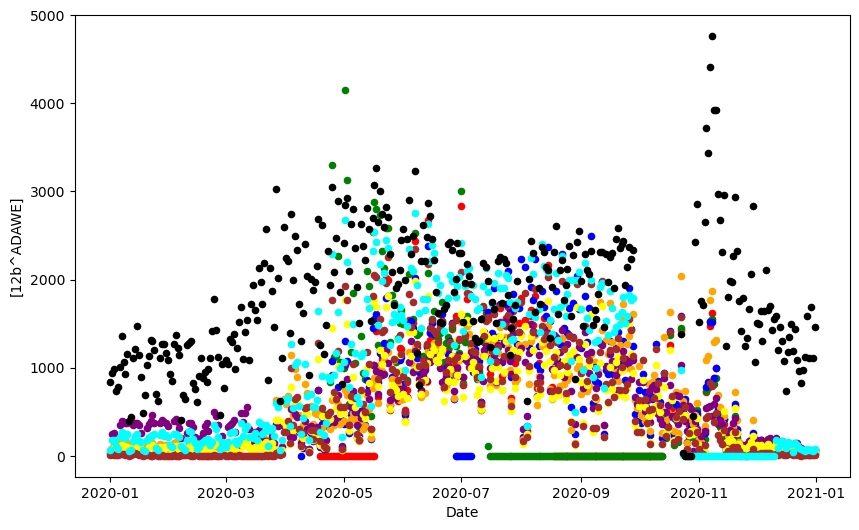

In [5]:
ax = bike2020.plot(x='Date', y=['1^ALEX'], kind='scatter', color='red', figsize=(10,6))
bike2020.plot(x='Date', y=['2^ORPY'], kind='scatter', color='green', ax=ax)
bike2020.plot(x='Date', y=['3^COBY'], kind='scatter', color='blue', ax=ax)
bike2020.plot(x='Date', y=['4^CRTZ'], kind='scatter', color='orange', ax=ax)
bike2020.plot(x='Date', y=['5^LMET'], kind='scatter', color='purple', ax=ax)
bike2020.plot(x='Date', y=['10^OGLD'], kind='scatter', color='yellow', ax=ax)
bike2020.plot(x='Date', y=['11 OBVW'], kind='scatter', color='brown', ax=ax)
bike2020.plot(x='Date', y=['12a^ADAWE'], kind='scatter', color='cyan', ax=ax)
bike2020.plot(x='Date', y=['12b^ADAWE'], kind='scatter', color='black', ax=ax)

These scatter plots show the counts for all of the bike counters as a function of time where each bike counter is displayed in a different colour.

For Machine Learning algorithms to work properly, the data they are trained on needs to be of good quality. Wrong data will have an impact on our trained model which will result in it performing poorly. The saying for this is "garbage in, garbage out".

For example, the plotting graph shows several dates where there is no data registered on the routes at all, indicating 0 bike trips. The assumption we are working from, based on the website data summary, is that there is at least one cyclist every day, even in the worst of weathers. We will assume then, that the 0 value means that the road was closed or the counter was broken. Is that a valid assumption? For the purpose of our prediction model it will have a worse impact on the accuracy of results if we keep the 0 value than if we clean it up. So we will remove this data by changing the value from 0 to a missing value. This will improve the validity of our results in the Linear Regression.  

In fact, it is RDM best practice is never to have a blank or empty value in a cell. In our example, we don't want a 0 value because it will be processed as a numerical value. If we change it to a missing value then it means that this value should be ignored in the data processing. Pandas has `pd.NA` to indicate that this value is Not Available. Other libraries might refer to it as Not a Number (NaN).

In [6]:
# Loop over all column names except the Date column
for colname in bike2020.columns.drop('Date'):
    bike2020.loc[bike2020[colname] <= 0.01, colname] = pd.NA

Now we plot the data again to see what it looks like now.

<Axes: xlabel='Date', ylabel='[12b^ADAWE]'>

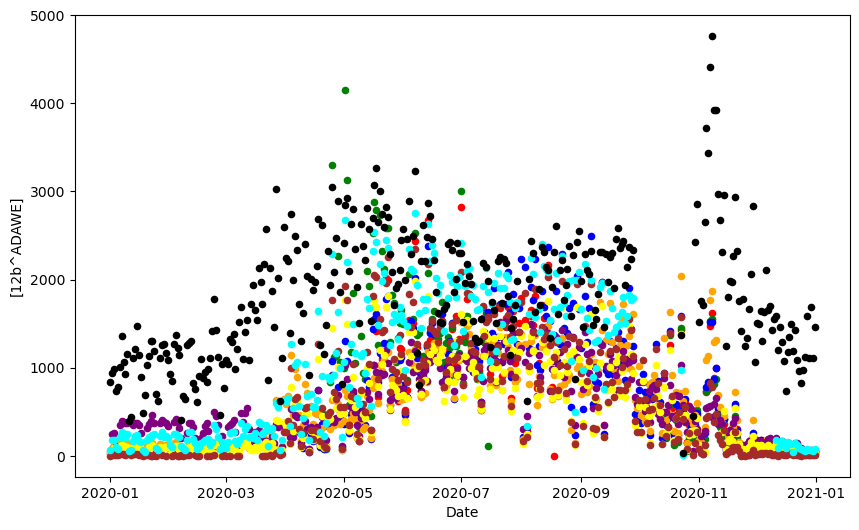

In [7]:
ax = bike2020.plot(x='Date', y=['1^ALEX'], kind='scatter', color='red', figsize=(10,6))
bike2020.plot(x='Date', y=['2^ORPY'], kind='scatter', color='green', ax=ax)
bike2020.plot(x='Date', y=['3^COBY'], kind='scatter', color='blue', ax=ax)
bike2020.plot(x='Date', y=['4^CRTZ'], kind='scatter', color='orange', ax=ax)
bike2020.plot(x='Date', y=['5^LMET'], kind='scatter', color='purple', ax=ax)
bike2020.plot(x='Date', y=['10^OGLD'], kind='scatter', color='yellow', ax=ax)
bike2020.plot(x='Date', y=['11 OBVW'], kind='scatter', color='brown', ax=ax)
bike2020.plot(x='Date', y=['12a^ADAWE'], kind='scatter', color='cyan', ax=ax)
bike2020.plot(x='Date', y=['12b^ADAWE'], kind='scatter', color='black', ax=ax)

You can see that the stretches of zeros has disappeared. Better! It now looks more like what you would expect.

The black plot looks odd, though, it has a significantly different pattern than the plots for the other colours. There is a weird peak in November for "12b^ADAWE". The website that the data was downloaded from refers to this as "Adàwe Crossing Pedestrians". Is that really cyclists? Is this another set of outlier values that will impact the validity of our prediction model? We don't know enough yet to be sure however. So we will leave these data points in for now but mark them in our minds as suspicious. We'll do some more tests later.

#### Data set 2: Weather data

Now lets take a look at the weather datset we will combine with the cyclist data! Use file "en_climate_daily_ON_6106001_2020_P1D.csv" in the tutorial repository. This data was originally downloaded from Environment Canada.

Let's read in that data using `pd.read_csv` function from Pandas to store the data in the new variable called `weather2020`. We'll follow that up with our `.info()` function that we used before to check how many missing values we are dealing with.

The link in the comment points to where we downloaded the data from. It's good practise to keep track of where you get your data from.

In [8]:
# https://climate.weather.gc.ca/climate_data/daily_data_e.html?hlyRange=2011-12-14%7C2023-01-25&dlyRange=2011-12-15%7C2023-01-25&mlyRange=%7C&StationID=49568&Prov=ON&urlExtension=_e.html&searchType=stnName&optLimit=yearRange&StartYear=1840&EndYear=2023&selRowPerPage=25&Line=14&searchMethod=contains&txtStationName=ottawa&timeframe=2&time=LST&Day=25&Year=2020&Month=1#
weather2020 = pd.read_csv('en_climate_daily_ON_6106001_2020_P1D.csv')
weather2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              366 non-null    float64
 1   Latitude (y)               366 non-null    float64
 2   Station Name               366 non-null    object 
 3   Climate ID                 366 non-null    int64  
 4   Date/Time                  366 non-null    object 
 5   Year                       366 non-null    int64  
 6   Month                      366 non-null    int64  
 7   Day                        366 non-null    int64  
 8   Data Quality               0 non-null      float64
 9   Max Temp (°C)              362 non-null    float64
 10  Max Temp Flag              4 non-null      object 
 11  Min Temp (°C)              362 non-null    float64
 12  Min Temp Flag              4 non-null      object 
 13  Mean Temp (°C)             362 non-null    float64

In these columns we see many different types of weather measurements. We see many columns with 366 non-null (i.e. not missing) counts, meaning that there is data for every single day of that (leap) year for those columns. However, there are also many columns that have very few data points. We can't do much training if we barely have any data.

So before we even look at what these columns mean, we can already decide to remove the columns with just 0 or 4 data points since we can't train our model using those columns if we don't have data.

In [9]:
weather2020.drop(['Data Quality', 'Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag', 'Heat Deg Days Flag', 'Cool Deg Days Flag'], inplace=True, axis=1)

Now lets look at what the columns actually mean to see if we need to keep those columns or not since we can get rid of the columns that don't add additional variables needed for the machine learning model. For example, we can remove location data, as all this data was collected from the same weather station. Also day, month, year we don't need since we have a duplicate variable, Date/Time.

In [9]:
weather2020.drop(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Year', 'Month', 'Day'], inplace=True, axis=1)

Finally, all the "Flag" columns are just notes on data that we have represented in other fields. Because Environment Canada has followed RDM best practices, they also provide a summary of the variables on the webpage of Environment Canada. Based on this summary, we can decide to delete these variables from the dataset, because this will improve the accuracy of our prediction model. 

You'll notice we had already deleted a bunch of Flag columns earlier due to lack of data, but that was before we even looked at the meaning of the columns.

In [10]:
weather2020.drop(['Total Rain Flag', 'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag', 'Dir of Max Gust Flag', 'Spd of Max Gust Flag'], inplace=True, axis=1)

We'll use the same plotting function again to examine the data visually. A graph will often let you quickly see if something doesn't look right like outliers. Let's plot some of the temperature columns to begin with.

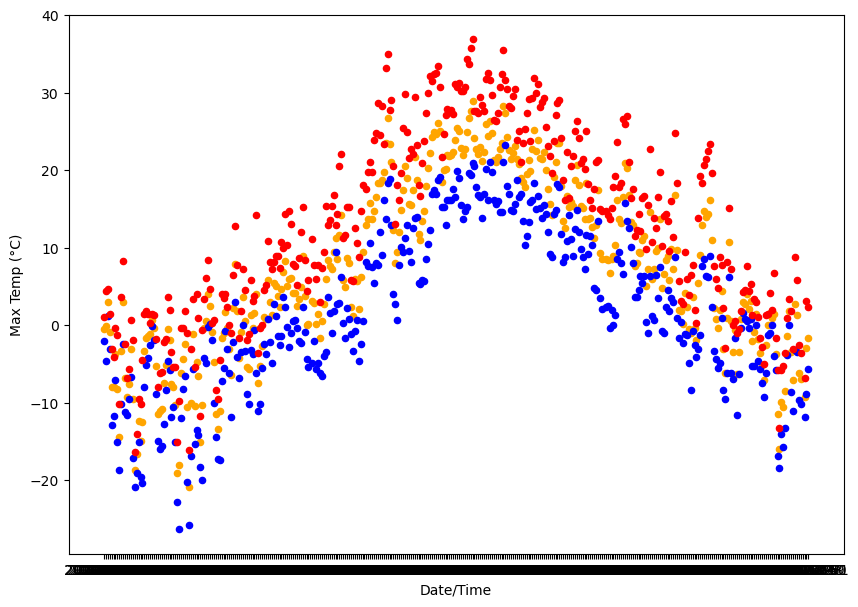

In [11]:
ax = weather2020.plot(x = 'Date/Time', y = 'Mean Temp (°C)', kind='scatter', color='orange', figsize=(10,7))
ax = weather2020.plot(x = 'Date/Time', y = 'Min Temp (°C)', kind='scatter', color='blue', ax=ax)
ax = weather2020.plot(x = 'Date/Time', y = 'Max Temp (°C)', kind='scatter', color='red', ax=ax)

Comment: "issue can be seen from `.info()` above" needs more context. I can't find it to understand what we are fixing lol. There is a logic issue in this section for the reader (I am lost)

The plotting pattern appears consistent, however the x-asis (Dat/Time) has labeling that is very weird! Why is it just a set of lines without the years rendering?

The issue is that the data is not recognized as a continuous variable, so the plotting function is trying to plot it as categorical data which in turn means it will try to show a label for each date! The black lines are just 366 of these data all written on top of each other.

If we look back at the `.info()` function was used above, we can see that the type of data was `object`. That's not what we want, we want a `datetime64` which is a type of value for storing dates in Python.

There are two ways to correct this. Either specify type during the reading of the data with the `pd.read_csv` function or correct it after reading the data.

We'll do the second option here and convert the data type `object` to `datetime64` for the Date/Time column.

In [12]:
weather2020['Date/Time'] = weather2020['Date/Time'].astype('datetime64')

Now we plot it again with the same code as our previous plot. It now looks different because we modified the data it is plotting.

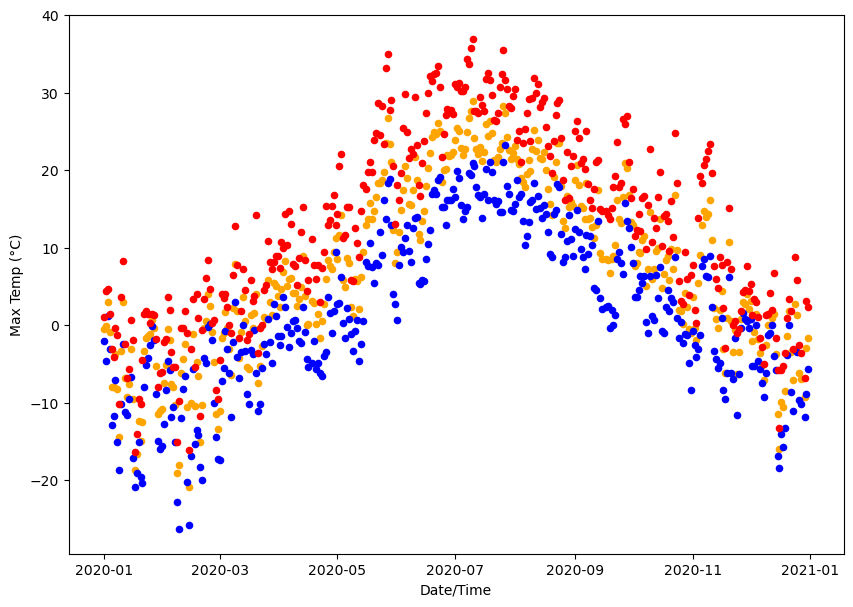

In [13]:
ax = weather2020.plot(x = 'Date/Time', y = 'Mean Temp (°C)', kind='scatter', color='orange', figsize=(10,7))
ax = weather2020.plot(x = 'Date/Time', y = 'Min Temp (°C)', kind='scatter', color='blue', ax=ax)
ax = weather2020.plot(x = 'Date/Time', y = 'Max Temp (°C)', kind='scatter', color='red', ax=ax)

Looks good! All the dates are now rendered on the x-axis in a very readable fashion.

Now we are ready to combine our two datasets so we can actually relate the cyclist data to the weather data. Pandas comes with a merge function that lets you merge two datasets on a certain column. In our case, that would be "Date" and "Date/Time".

In [14]:
data2020 = pd.merge(left=bike2020, right=weather2020, left_on='Date', right_on='Date/Time')
data2020.drop('Date/Time', inplace=True, axis=1)

Let's see what column we now have available to us from this combined data set using the `.columns` property of `data2020`.

In [15]:
data2020.columns

Index(['Date', '1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD',
       '11 OBVW', '12a^ADAWE', '12b^ADAWE', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)',
       'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)'],
      dtype='object')

With our combined data set we can further explore the data since now we can plot columns of our bike counter data set versus columns in our weather data set. Let's start by plotting the mean temparture versus the number of bikes for the counter called "1^ALEX".

<Axes: xlabel='Mean Temp (°C)', ylabel='1^ALEX'>

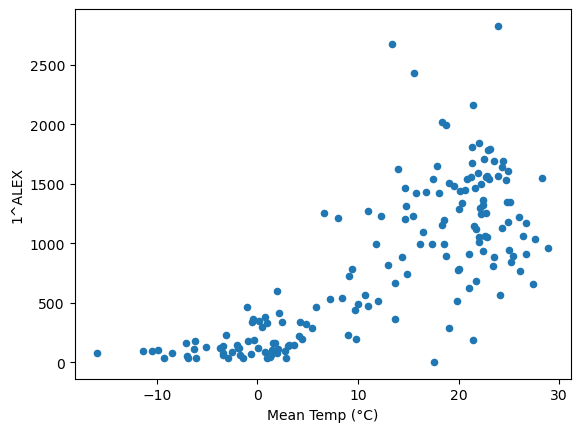

In [16]:
data2020.plot(kind='scatter', x='Mean Temp (°C)', y='1^ALEX')

There definitely seems to be a relation between temperature and number of cyclists on the NCC Alexandra Bridge Bikeway ("1^ALEX"). Also note that we don't see many data points under -10 °C. We can understand why, by reading the data documentation on the Open Ottawa website.

> Winter Counts:
> 
> Only the counters designated as 'winter' counters have valid data after the first snow accumulation, until snow has been removed or melted away in spring. Winter counters imply some winter maintenance of the pathway or bike lane. The Somerset counter bike lane (westbound only) is cleared of snow on a best-effort basis only, and typically will not show all the cyclists along that route immediately following a heavy snow-fall.

And this counter is indeed not marked as winter. So it's simply not plowed.

"But wait!", you might think. Didn't we just remove a whole bunch of 0 values earlier? Wouldn't that simply be the result of winter? Well, it could have been but if you look back at the plots with the stretches of zeroes, you can see they were in May, July, and September when it's not very likely to have snowed. Additionally, the documentation that comes with the data set says data after the first snow accumulation is not valid for non-winter paths. So that's all still good.

Now how about rain? Does that affect the number of cyclist counted? You'd think so since who likes cycling in the rain? But let's plot it and see.

<Axes: xlabel='Total Rain (mm)', ylabel='12a^ADAWE'>

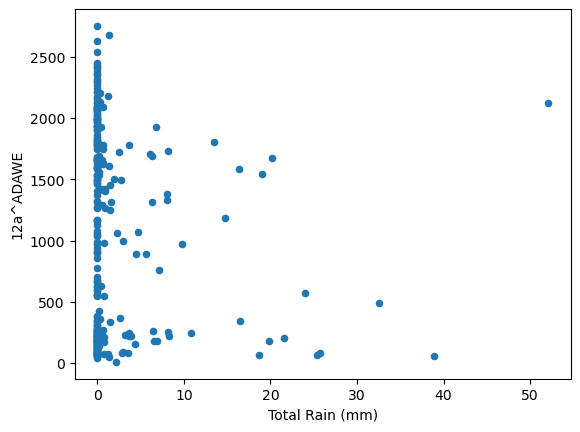

In [17]:
data2020.plot(kind='scatter', x='Total Rain (mm)', y='12a^ADAWE')

This plotting graph shows us that there are are fewer cyclists (y-axis) on the days that have more milimeters of rainfall (y-axis), but it's not a very strong effect.

Here, you can also see that there are many days without rain at all. This is a good example of potential bias in training data. We have lots more data for non-rainy days, or days with minimal milimeters of rainfall, so when we train our algorithm it might just ignore the effect of rain. To see why, imagine you have 10000 data points that lack a certain property, but 10 that do. Any data that those 10 data points carry will then effectively be noise during the training of the model.

Looking closer at the graph above, what's up with that dot on the right?! It is reporting more than 2000 cyclists on a day with over 50mm of rainfall? So many cyclists in a massive storm? That seems suspicious. This is probably an outlier and we should remove it form our training dataset. But first, let's check another counter.

<Axes: xlabel='Total Rain (mm)', ylabel='4^CRTZ'>

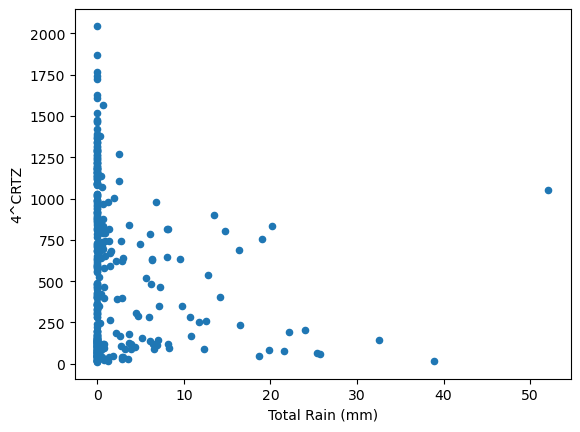

In [18]:
data2020.plot(kind='scatter', x='Total Rain (mm)', y='4^CRTZ')

The outlier is also present for "4^CRTZ". It seems to be something persistent for that particular rainy day. Let's see the whole row

In [19]:
data2020[data2020['Total Rain (mm)'] > 50]

,Date,1^ALEX,2^ORPY,3^COBY,4^CRTZ,5^LMET,10^OGLD,11 OBVW,12a^ADAWE,12b^ADAWE,...,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
156,2020-06-05,1452.0,2340.0,1527.0,1054.0,1297.0,1129.0,1461.0,2125.0,2294.0,...,0.0,NaN,2.6,NaN,52.1,0.0,52.1,NaN,20.0,52.0


Either the rain sensor was malfunctioning or the bike counters don't like lots of rain. Better get rid of that row because it does not make any sense for there suddenly be so many cyclists on all of the bike paths on the day it with the most heavy rain of the whole year by far.

In [20]:
data2020.drop(156, inplace=True)

Now that we have removed the outliers, let's look at more correlations using the `.corr()` function on our data. Since we can only do correlation on numbers we first select only the columns that actually contain numbers.

The `.background_gradient` function will let us assign colours in the tables. Dark blue means large negative correlation, dark red means large positive correlation. These are the weather conditions having the most impact on the number of cyclists, positive or negative.

In [21]:
corr = data2020.select_dtypes(['number']).corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

C:\Users\FAR4\AppData\Local\Temp\ipykernel_21060\1826579227.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,1^ALEX,2^ORPY,3^COBY,4^CRTZ,5^LMET,10^OGLD,11 OBVW,12a^ADAWE,12b^ADAWE,Data Quality,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
1^ALEX,1.00,0.90,0.97,0.89,0.87,0.97,0.95,0.88,0.42,nan,0.78,0.70,0.76,-0.77,0.48,-0.17,-0.24,-0.21,0.00,0.00,-0.18
2^ORPY,0.90,1.00,0.81,0.68,0.78,0.90,0.90,0.87,0.55,nan,0.68,0.55,0.63,-0.68,0.24,-0.20,-0.22,-0.24,-0.15,0.06,-0.08
3^COBY,0.97,0.81,1.00,0.86,0.91,0.95,0.93,0.88,0.42,nan,0.77,0.67,0.73,-0.75,0.39,-0.23,-0.23,-0.26,-0.04,0.04,-0.21
4^CRTZ,0.89,0.68,0.86,1.00,0.87,0.88,0.84,0.89,0.63,nan,0.81,0.71,0.77,-0.78,0.44,-0.17,-0.26,-0.24,-0.33,0.04,-0.15
5^LMET,0.87,0.78,0.91,0.87,1.00,0.89,0.88,0.92,0.48,nan,0.82,0.75,0.80,-0.80,0.51,-0.13,-0.26,-0.21,0.18,0.08,-0.14
10^OGLD,0.97,0.90,0.95,0.88,0.89,1.00,0.99,0.96,0.66,nan,0.79,0.69,0.76,-0.77,0.42,-0.16,-0.24,-0.22,-0.29,0.04,-0.12
11 OBVW,0.95,0.90,0.93,0.84,0.88,0.99,1.00,0.95,0.53,nan,0.79,0.69,0.75,-0.76,0.43,-0.15,-0.23,-0.21,-0.28,0.06,-0.11
12a^ADAWE,0.88,0.87,0.88,0.89,0.92,0.96,0.95,1.00,0.76,nan,0.85,0.77,0.82,-0.84,0.44,-0.13,-0.28,-0.21,-0.19,0.04,-0.15
12b^ADAWE,0.42,0.55,0.42,0.63,0.48,0.66,0.53,0.76,1.00,nan,0.49,0.40,0.45,-0.52,0.00,-0.25,-0.34,-0.35,-0.45,0.07,-0.16
Data Quality,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


We can see a fair bit of positive correlation between the bike counters themselves. That is, if there is a lot of traffic on one bike path, it's likely there is more traffic on other bike paths as well.

However, if we look at "12b^ADAWE", we can see it is very much unlike all the other paths. If you remember, this is the one we made a mental note about earlier, suspecting these were pedestrians, not cyclists. Through this correlation map, we can now see we have another reason that this column is not reliable cycling data and thus should be removed.

What else can we see? In all other columns, we see a strong positive correlation with temperature. People cycle more when it's warmer. So that makes sense. There's also a fairly strong negative correlation with "Heat Deg Days (°C)", but what is that? From the Environment Canada website:

> **Heating Degree-days**
> 
> Heating degree-days for a given day are the number of degrees Celsius that the mean temperature is below 18 °C. If the temperature is equal to or greater than 18 °C, then the number will be zero. For example, a day with a mean temperature of 15.5 °C has 2.5 heating degree-days; a day with a mean temperature of 20.5 °C has zero heating degree-days. Heating degree-days are used primarily to estimate the heating requirements of buildings.

So it's just a day on which people turn on their heating. i.e. cold days.

Other correlations here are snow, rain and wind speed which are somewhat correlated with less cycling. The direction of wind doesn't matter much though with correlations of at most 0.08 (out of 1).

The other thing we need to think about for the data columns is how independent they are. That is, it doesn't make sense to predict the number of cyclist on both "max temp" and "mean temp" since the correlation is almost 1. They carry essentially the same value so we would just be introducing ambiguity into the model. 

The same redundency occurs with "total precipitation" and "total rain." It's probably better to use only the values for "precipitation;" or only the values for "snow" and "rain."

Ok, so lets remove 12b^ADAWE, Min Temp (°C), Mean Temp (°C), and Total Precip (mm) from our training data set.

In [22]:
data2020.drop(['12b^ADAWE', 'Min Temp (°C)', 'Mean Temp (°C)', 'Total Precip (mm)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)'], inplace=True, axis=1)

We now have a pretty clean data set, but there is still some **missing data**

In [23]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       365 non-null    datetime64[ns]
 1   1^ALEX                     171 non-null    float64       
 2   2^ORPY                     166 non-null    float64       
 3   3^COBY                     256 non-null    float64       
 4   4^CRTZ                     365 non-null    float64       
 5   5^LMET                     365 non-null    float64       
 6   10^OGLD                    356 non-null    float64       
 7   11 OBVW                    329 non-null    float64       
 8   12a^ADAWE                  288 non-null    float64       
 9   Data Quality               0 non-null      float64       
 10  Max Temp (°C)              361 non-null    float64       
 11  Max Temp Flag              4 non-null      object        
 12  Min Temp

Only three of the seven counters have daily data (Date, 4^CRTZ, and 5^LMET). Weather data is missing on some days. We could drop all the rows that have missing data, but that means we will throw away data from rows that have useful data in the other columns!

As we saw before, RDM best practice is to never have empty values. The reason we can't just keep the missing values in our data set is because any machine learning algorithm will need complete rows without any missing values to work properly. It doesn't know how to handle missing values, so we have to assign values or delete the rows, before feeding the data set to the model to train on.

In fact, lets see how many rows we are left with if we delete all the rows that have even a single missing value.

In [24]:
len(data2020.dropna())

0

Only 13 rows left. This is not a large enough data set to train our model with! Let's not do that! What else can we do though?

We can impute data. Imputing data means to infer a value based on existing evidence and reasoning. While it may seem like "making data up" or fancy lying, it is actually a valid methodology. We could substitute the missing values with the mean, or we could use interpolation of data from neighbouring days. Any approach can be used that could lead to reasonable guesses. An ethical RDM best practice in this case, would be clear documentation of the methodology for imputation so that the data values can be independently verified. 

For example, the "Snow on Grnd (cm)" is missing a lot of values. Let's see what's up with that.

<Axes: xlabel='Date', ylabel='Snow on Grnd (cm)'>

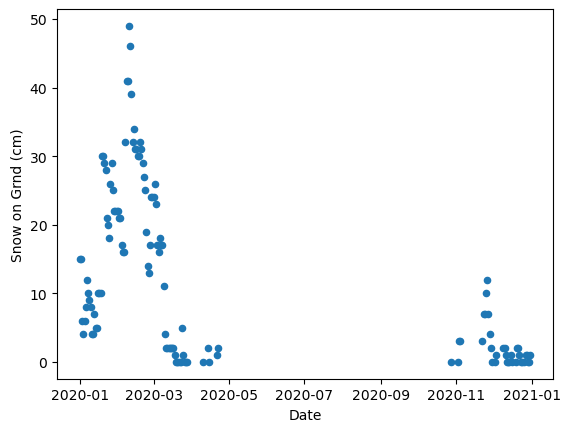

In [25]:
data2020.plot(x='Date', y='Snow on Grnd (cm)', kind='scatter')

Right, we can infer from this visualization that the missing values indicate that the snow on the ground is not measured in the summer months. Based on this assumption, we can fill all missing values with 0 to represent 0cm snow coverage. Let's run the data set again to see the results (JvdK is this what you are doing?)

<Axes: xlabel='Date', ylabel='Snow on Grnd (cm)'>

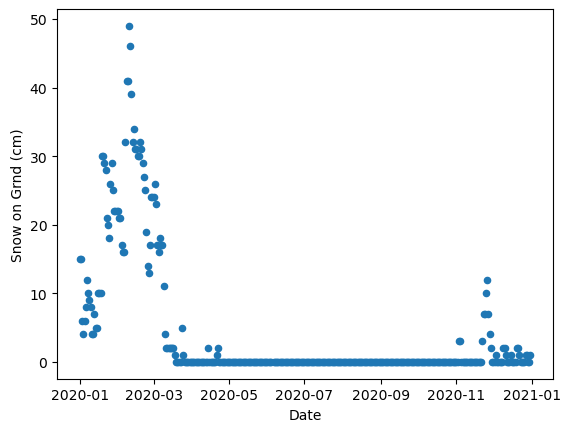

In [26]:
data2020.fillna({'Snow on Grnd (cm)': 0}).plot(x='Date', y='Snow on Grnd (cm)', kind='scatter')

The inference of 0cm of snow flattens the plotting graph pattern too much, which means that imputing the data will produce and inacurate prediction of weather conditions in our model (JVdeK is this correct? elaborate here on what you see that makes it "too much"). For example, we can see that in late November there was a 4cm of snow on the ground, but then it suddenly disappered. It might be better to use the backfill method for imputing the missing values. This method copies the value from the next day to fill in any missing values. So if 20 November is missing a value, then the value from 19 November will be used instead. If that is missing, use the data from 18 November, and so forth. Let's see how that looks on the graph: 

<Axes: xlabel='Date', ylabel='Snow on Grnd (cm)'>

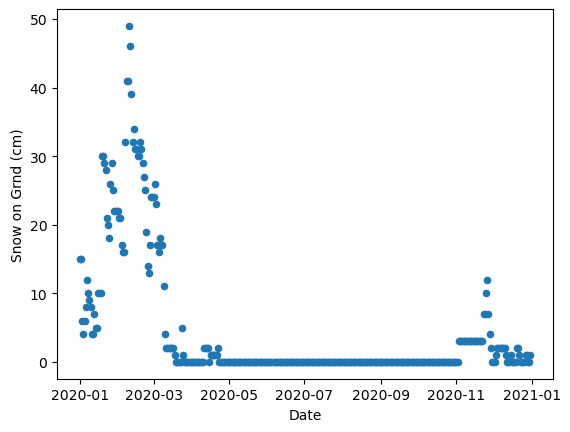

In [27]:
data2020['Snow on Grnd (cm)'] = data2020['Snow on Grnd (cm)'].fillna(method='backfill')
data2020.plot(x='Date', y='Snow on Grnd (cm)', kind='scatter')

That looks better JvdK why does it look better?). Lets see how many complete rows we have now.

In [28]:
len(data2020.dropna())

0

Better indeed! (JvdK why better? what do you see?)

Next we will impute the missing data for the wind gusts

<Axes: xlabel='Date'>

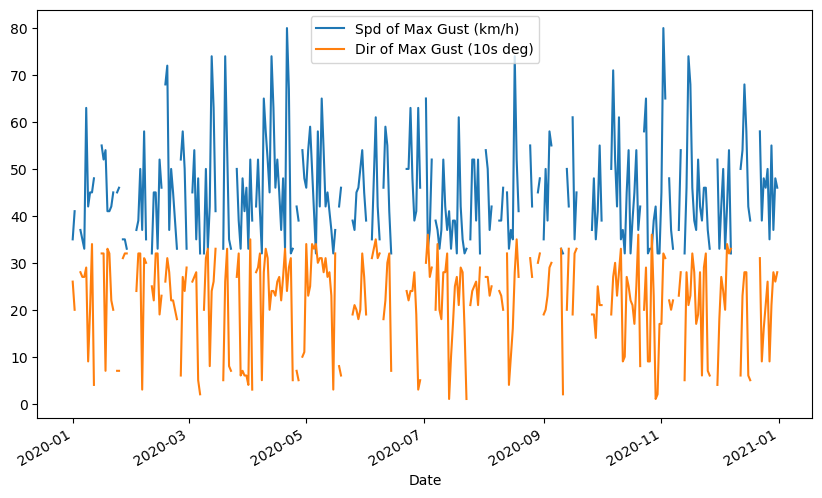

In [29]:
data2020.plot(x='Date', y=['Spd of Max Gust (km/h)', 'Dir of Max Gust (10s deg)'], kind='line', figsize=(10,6))

**Comment: In the paragraph below, you mentioned "backfill won't do much either." I am not sure how important that is or how much the user might know about that but I think it can use a bit of explanation if it serves an important pupose of even can be removed since we are not actually using that.**

That graph seems to vary a lot and it's all over the place. Setting ithe missing values to 0 zero isn't good (JvdK why?), but the backfill method won't do much either, since the values on each day varies so much. That is, backfill assumes that the previous day is a good indicator of what today should be, but the wind just varies to much from day to day for that to work. So lets just use the mean value for the speed and the wind direction, as a compromise for the "average" wind measurement.

Mean isn't an ideal representative value either, due to all the variability, but it's the best we can do for the accuracy of our model. The wind columns don't have too many missing values so the imputed data will not have a statistically significant impact on the prediction results. So let's fill in the missing values with the mean:

In [31]:
data2020.fillna({
    'Dir of Max Gust (10s deg)': data2020['Dir of Max Gust (10s deg)'].mean(),
    'Spd of Max Gust (km/h)': data2020['Spd of Max Gust (km/h)'].mean()
}, inplace=True)

How many full rows do we have now?

In [32]:
len(data2020.dropna())

0

In [33]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       365 non-null    datetime64[ns]
 1   1^ALEX                     171 non-null    float64       
 2   2^ORPY                     166 non-null    float64       
 3   3^COBY                     256 non-null    float64       
 4   4^CRTZ                     365 non-null    float64       
 5   5^LMET                     365 non-null    float64       
 6   10^OGLD                    356 non-null    float64       
 7   11 OBVW                    329 non-null    float64       
 8   12a^ADAWE                  288 non-null    float64       
 9   Data Quality               0 non-null      float64       
 10  Max Temp (°C)              361 non-null    float64       
 11  Max Temp Flag              4 non-null      object        
 12  Min Temp

Not a lot of missing values for the rest of the weather. The worst offender is Max Temp where 4 values are missing. We can use backfill again to fill those in based on observed patterns in the temperature fluctuation. (JvdK does this logic make sense?)

In [34]:
data2020['Max Temp (°C)'] = data2020['Max Temp (°C)'].fillna(method='backfill')
data2020['Total Rain (mm)'] = data2020['Total Rain (mm)'].fillna(method='backfill')
data2020['Total Snow (cm)'] = data2020['Total Snow (cm)'].fillna(method='backfill')

In [35]:
len(data2020.dropna())

0

We still have missing data for some of the bike counters. Let's look at all of them again

<Axes: xlabel='Date'>

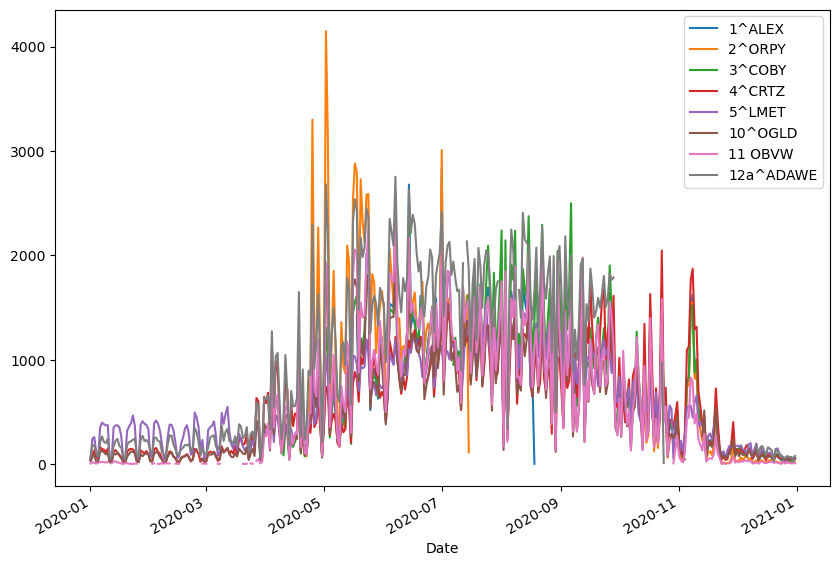

In [36]:
data2020.plot(x='Date', y=['1^ALEX','2^ORPY','3^COBY','4^CRTZ','5^LMET','10^OGLD','11 OBVW','12a^ADAWE'], figsize=(10,7))

They all follow roughly the same pattern. Lets fill missing values with the mean from the other counters on that day. (JvdK why did you chooose mean for this?) There are some outliers like "2^ORPY", but it still follows roughly the same pattern as some of the other counters. That is, the spikes are visible in "5^LMET" too for example. It doesn't have to be perfect. It just has to be good enough. And "good enough" in this context meaning, something our model can be trained on while still predicting valid output.

In [37]:
countercolumns = ['1^ALEX','2^ORPY','3^COBY','4^CRTZ','5^LMET','10^OGLD','11 OBVW','12a^ADAWE']
for colname in countercolumns: # Loop over all of the column names
    othercolumns = [c for c in countercolumns if c != colname] # Get the name of every column except this column we are doing now
    meanofmissing = data2020[data2020[colname].isna()][othercolumns].mean(axis=1) # Get the mean of all the other columns from the rows where this column is missing values
    data2020.loc[data2020[colname].isna(), colname] = meanofmissing # Replace the missing values in this column with the mean we calculated from the other columns.

We plot it again to see if we can spot anything out of the ordinary.

<Axes: xlabel='Date'>

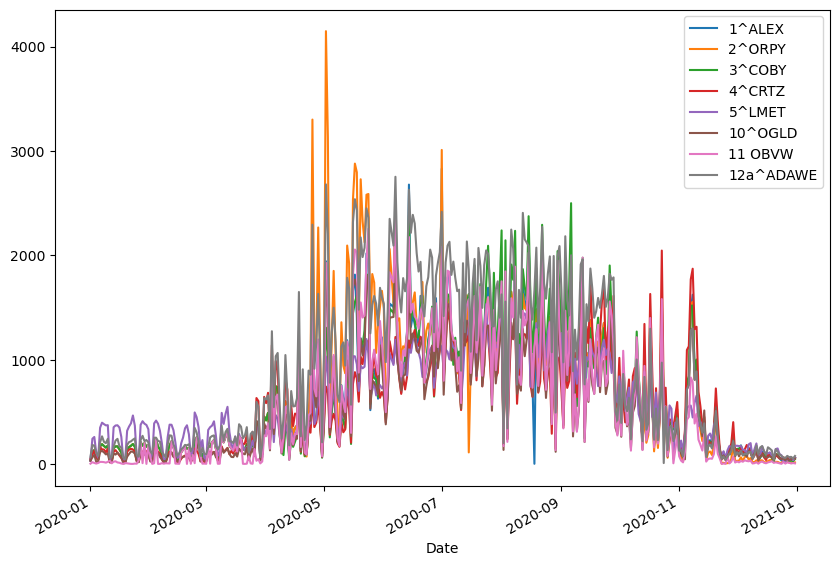

In [38]:
data2020.plot(x='Date', y=['1^ALEX','2^ORPY','3^COBY','4^CRTZ','5^LMET','10^OGLD','11 OBVW','12a^ADAWE'], figsize=(10,7))

In [39]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       365 non-null    datetime64[ns]
 1   1^ALEX                     365 non-null    float64       
 2   2^ORPY                     365 non-null    float64       
 3   3^COBY                     365 non-null    float64       
 4   4^CRTZ                     365 non-null    float64       
 5   5^LMET                     365 non-null    float64       
 6   10^OGLD                    365 non-null    float64       
 7   11 OBVW                    365 non-null    float64       
 8   12a^ADAWE                  365 non-null    float64       
 9   Data Quality               0 non-null      float64       
 10  Max Temp (°C)              365 non-null    float64       
 11  Max Temp Flag              4 non-null      object        
 12  Min Temp

We have the full data set now. All fields are filled in with reasonable values. We finally have a clean dataset we can work with. Remember, the purpose of all this data preparation, is because want to predict the number of cyclist depending on the weather. We can now build a model for each bike lane.

# Linear Regression Model for Machine Learning

Now that we have a nice and clean dataset, we can begin the machine learning part of this tutorial. As mentioned way in the beginning, we are going to use linear regression which is the simplest of machine learning algorithms. It assumes that everything is linearly related. That is, increase a value of A by 10%, and the valuse B will increase by 20%, and the value C will increase by 5% for example. You can picture this as plotting all of the points on a graph and then drawing one straight line through all of the points that fits the best.

In this case we have 6 weather columns that will form our input data for predicting the traffic on each of the bike paths. So if I were to try to plot that, it would become a 7-dimensional plot which is a bit hard to visualize!

Linear regression may be the simplest machine learning algorithm, but it also comes with limitations since it assumes that all relations with the various weather effects are linear which may not be completely true. Think about temperature. Too cold deters some cyclist, but so might too warm. RDM best practice would be to note these known limitations in your data documentation, or methodology section.

We will use scikit learn as our machine learning package. This is far from the only one available, but it's a nice one.

Let's import the linear regression model from that package so we can use it in our notebook.

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

We will need to train a model and then we need to test our model to see if it is any good at predicting bike trips based on weather. A very common way of doing this is to split your data set into a training and testing set. Sklearn has the function `train_test_split` for that.

In [41]:
from sklearn.model_selection import train_test_split

We have to distinguish between our input data (features) and the data we want to predict (labels). Let's see what columns we have again:

In [42]:
data2020.columns

Index(['Date', '1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD',
       '11 OBVW', '12a^ADAWE', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag',
       'Heat Deg Days Flag', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Snow (cm)', 'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)'],
      dtype='object')

We'll take the weather as input, so those will be our X values and we take the bike counters as the measurements we want to predict as the y values. Then we split the data into a training set and separate set for testing the models in a 70/30 split. (JvdK why? this split? is it the best way to verify that the training is producing statistically accurate resutls? I don't KNOW)

In [1]:
X = data2020[['Max Temp (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)']]
y = data2020[['1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD',
       '11 OBVW', '12a^ADAWE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

NameError: name 'data2020' is not defined

Now we fit the model using the training set. `model` is our linear regression model and we `fit` it to the training data.

In [45]:
model.fit(X_train, y_train)

LinearRegression()

The model has now been trained. We can see what the linear coefficients it found are, even though that doesn't tell us a whole lot.

In [46]:
model.coef_

array([[ 39.50884582, -23.54835404,   6.34895059,  -1.28875122,
          6.41356222,  -5.02540711],
       [ 39.44179753, -28.40441958,   5.04589813,  -3.443851  ,
          7.83210339,  -0.50084528],
       [ 42.95055536, -24.5098393 ,  10.3970751 ,  -0.37867248,
          7.86547809,  -7.26518742],
       [ 31.00977503, -21.23580146,  -0.8150481 ,  -3.13798824,
          3.29473089,  -4.58023129],
       [ 29.94886244, -14.42640741,  -1.5354402 ,   3.63782712,
          3.58875515,  -6.20043101],
       [ 32.46087824, -21.21701882,   2.34665099,  -2.71318517,
          4.37506703,  -3.59743307],
       [ 40.76203563, -24.79996656,  10.57479814,  -1.93947717,
          7.47155404,  -3.84111453],
       [ 52.14405643, -28.79938353,   5.81644183,  -1.3784645 ,
          5.92830738,  -5.83084298]])

Instead, we want to use the testing dataset we kept separate to evaluate how well our model did at predicting the labels based on the features. Scikit-learn has a few tools for that, so lets import those.

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

Then find the predicted values based on the input from our test set

In [48]:
predictions = model.predict(X_test)

We can then compare that to the real output values we kept in our test set. We calculate the $R^2$ score as well as the mean square error which tells us how badly the predicted output data deviates from the real output.

In [49]:
r2_score(y_test, predictions)

0.6900090083377539

In [50]:
mean_squared_error(y_test, predictions, squared=False)

323.93288468384003

The close the $R^2$ score is to 1, the better the fit was. In this case it's about 0.7 so it's not supergood, but it's not bad either. The mean square error tells you how much the predicted counts deviate from the real counts and it's about 300, so that means that our predictions are on average within 300 of the real value. Which is ok-ish. It depends on the evel of precision is good enough for this particular use case.

Ok, time for a more visual approach. Let's see how well this works for 2019. Our data set was for 2020 and that's what we trained on. Our model has never seen the year 2019.

Let's read the bike_counter.xlsx file again but this time take the 2019 tab.

In [52]:
bike2019 = pd.read_excel('bike_counter.xlsx', sheet_name="2019")

We don't care too much about fixing the weather data for just comparing, but at least fill in the missing snow otherwise we will miss too much.

In [53]:
weather2019 = pd.read_csv('en_climate_daily_ON_6106001_2019_P1D.csv')
weather2019 = weather2019[['Date/Time', 'Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)',
             'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)']]
weather2019['Snow on Grnd (cm)'] = weather2019['Snow on Grnd (cm)'].fillna(method='backfill')

Now drop all rows with missing values. We also need to reset the index in pandas otherwise assigning values becomes a bit weird later on.

In [54]:
weather2019 = weather2019.dropna().reset_index().drop('index', axis=1)

Do the prediction using the 2019 weather.

In [55]:
bikepred2019 = pd.DataFrame(
    model.predict(
        weather2019.drop('Date/Time', axis=1)),
        columns=['1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD', '11 OBVW', '12a^ADAWE'])
bikepred2019['Date'] = weather2019[['Date/Time']].astype('datetime64')

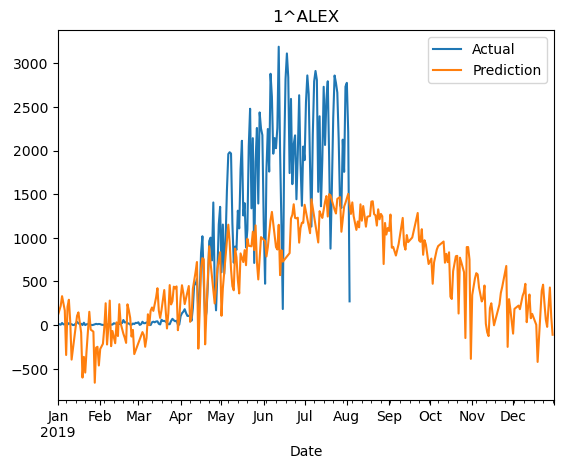

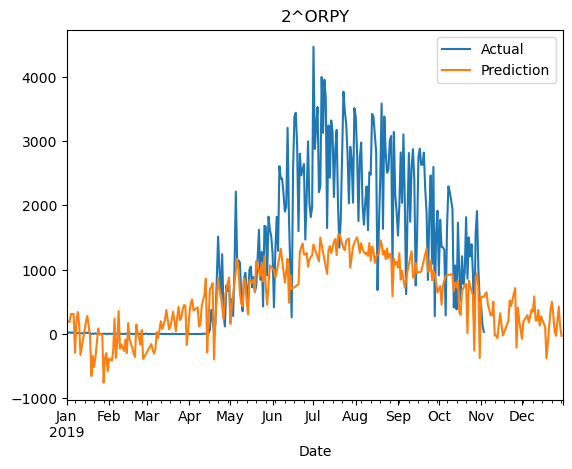

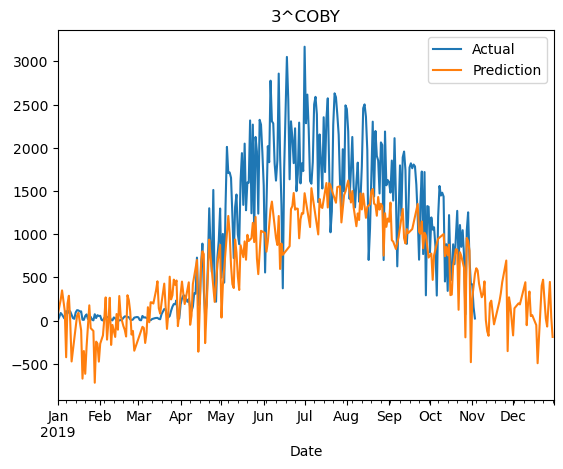

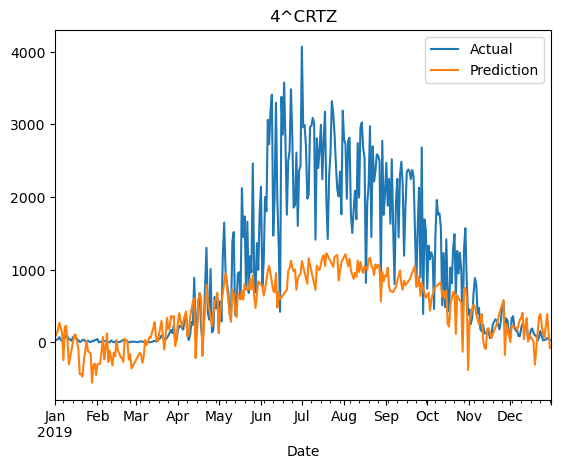

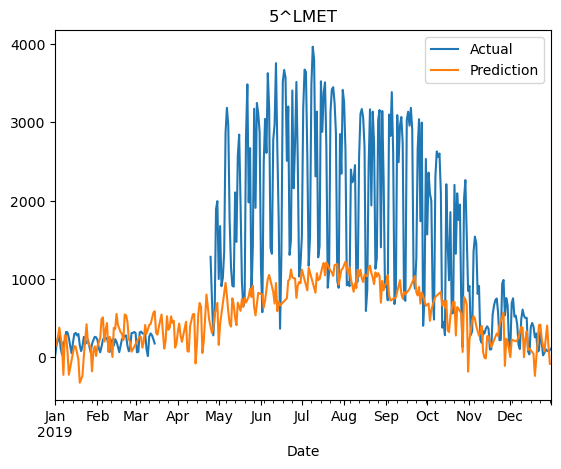

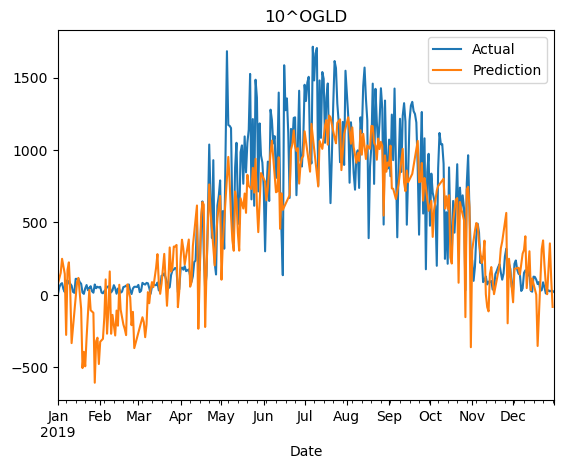

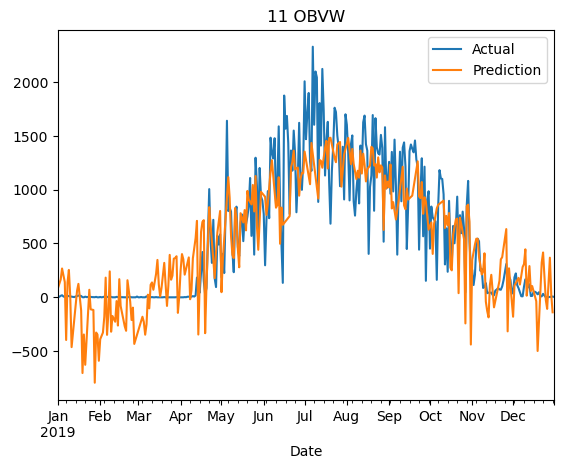

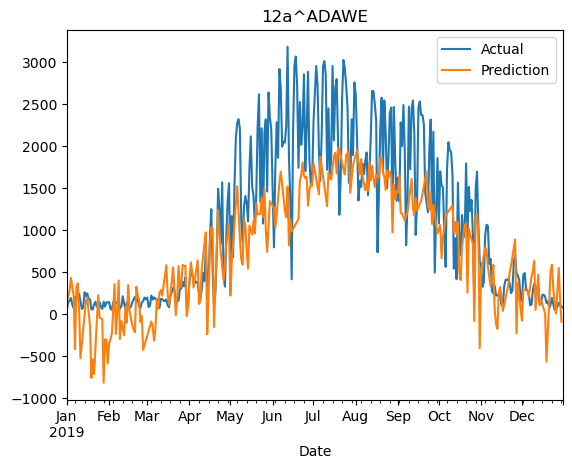

In [56]:
for colname in ['1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD', '11 OBVW', '12a^ADAWE']:
    ax = bike2019.plot(x='Date', y=colname, label='Actual', title=colname)
    bikepred2019.plot(x='Date', y=colname, ax=ax, label='Prediction')

# Conclusion
The model works fairly well for some of the lanes (10^OGLD and 11^OBVW), but rather poorly for some of the others (4^CRTZ and 5^LMET for example). It always reproduces the overall trend though. Keep in mind that the date was not part of the training data. It's solely reproducing this trend from the weather data which is pretty impressive!

In this training you learned various data cleaning techniques and how to apply them. You also learned that it requires making assumptions and justifying them. Finally, you learned how to use this cleaned data set and apply the linear regression model to it to predict values based on previously unknown input data.

Now you are ready to start the next course about random forests and decision trees.